In [2]:
import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
sns.set_context('notebook')
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']
import tqdm
### notebook specific configuration ###
from os.path import basename
mpl.style.use('fivethirtyeight')

In [3]:
from Modules.Homer import *

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
sys.path.append('/home/isshamie/software/NGS-Pipeline')

In [5]:
ref_fa = '/data/genome/hamster/picr/picr.fa'
annotation = '/data/genome/hamster/picr/updated_final_sort.gff3'

mrna_peak = '/data/isshamie/TSS_CHO/mRNA.peak'

In [6]:
tissues = ['BloondnegSpleen','BMDM1hKLA1','BMDMwt','Brain','Brain7neg1',
          'FemaleReproductive','Heart','Intestine','Kidney','Liver','Lung',
           'MiscOrgans','Muscle','Pancreas','Skin','Spleen','Total','CHO']

In [7]:
len(tissues)

18

#### Create meta sample dataframe for reference

In [8]:
meta_samples = pd.DataFrame(columns=['Experiment','Tissue','Short'])
for curr_tissue in tissues:
    curr_raw = glob.glob(curr_tissue + '/*/')
    for j in curr_raw:
        curr_type = j.split('/')[-2]  
        if not curr_type == 'ATAC':
            count = 1
            for f in  glob.glob(j + '*f04_peaks/merge*bg*peak'):
                meta_samples = meta_samples.append(pd.DataFrame({'Tissue':curr_tissue, 'Experiment':curr_type,
                                                                'Short': curr_tissue + '_' + curr_type},index=[f]))
meta_samples    

,Experiment,Short,Tissue
BloondnegSpleen/GRO/f04_peaks/merge_bg_2.peak,GRO,BloondnegSpleen_GRO,BloondnegSpleen
BloondnegSpleen/mSTART/f04_peaks/merge_bg_2.peak,mSTART,BloondnegSpleen_mSTART,BloondnegSpleen
BMDM1hKLA1/GRO/f04_peaks/merge_bg_2.peak,GRO,BMDM1hKLA1_GRO,BMDM1hKLA1
BMDMwt/GRO/f04_peaks/merge_bg_2.peak,GRO,BMDMwt_GRO,BMDMwt
Brain/GRO/f04_peaks/merge_bg_2.peak,GRO,Brain_GRO,Brain
Brain/mSTART/f04_peaks/merge_bg_2.peak,mSTART,Brain_mSTART,Brain
Brain7neg1/mSTART/f04_peaks/merge_bg_2.peak,mSTART,Brain7neg1_mSTART,Brain7neg1
FemaleReproductive/mSTART/f04_peaks/merge_bg_2.peak,mSTART,FemaleReproductive_mSTART,FemaleReproductive
Heart/mSTART/f04_peaks/merge_bg_2.peak,mSTART,Heart_mSTART,Heart
Intestine/mSTART/f04_peaks/merge_bg_2.peak,mSTART,Intestine_mSTART,Intestine


In [7]:
genome_ann_mrna = pd.read_csv(mrna_peak,sep='\t',index_col=0)

In [8]:
genome_ann_mrna.head()

,Chr,Start,End,Strand
ID,,,,
ID=asmbl_1;Parent=gene_1_1;gene_id=gene_1_1;gene=gene_1;transcript_id=asmbl_1;cs=5,picr_0,9,11,+
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,175,177,+
ID=asmbl_3;Parent=gene_1_3;gene_id=gene_1_3;gene=gene_1;transcript_id=asmbl_3;cs=5,picr_0,3879,3881,+
ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_5;cs=2,picr_0,7714,7716,-
ID=asmbl_6;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_6;cs=1,picr_0,7714,7716,-


In [9]:
genome_ann_exon = pd.read_csv('/data/isshamie/TSS_CHO/exon.peak',sep='\t',index_col=0)

In [10]:
genome_ann_exon.head()

,Chr,Start,End,Strand
ID,,,,
ID=asmbl_117.exon1;Parent=asmbl_117;gene_id=gene_27_2;gene=gene_27;transcript_id=asmbl_117,picr_0,1599199,1599201,+
ID=asmbl_118.exon1;Parent=asmbl_118;gene_id=gene_27_3;gene=ARHGAP8;transcript_id=asmbl_118,picr_0,1599203,1599205,+
ID=asmbl_119.exon1;Parent=asmbl_119;gene_id=gene_27_3;gene=ARHGAP8;transcript_id=asmbl_119,picr_0,1599276,1599278,+
ID=asmbl_117.exon2;Parent=asmbl_117;gene_id=gene_27_2;gene=gene_27;transcript_id=asmbl_117,picr_0,1608734,1608736,+
ID=asmbl_114.exon2;Parent=asmbl_114;gene_id=gene_27_1;gene=ARHGAP8;transcript_id=asmbl_114,picr_0,1608734,1608736,+


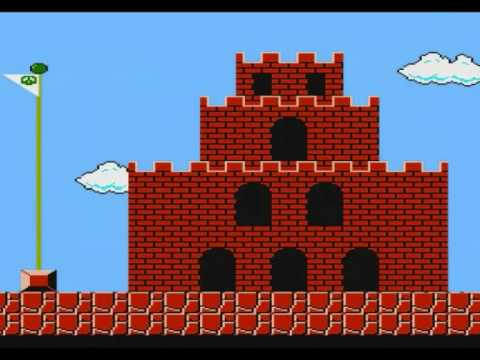

In [12]:
from IPython.display import Image
Image(filename='/home/isshamie/mario_chapter.jpg',width=600)

# Comparing across tissues

### Compare total number of peaks across tissues
[Does not merge peaks from the same tissue together]

In [21]:
num_peaks = dict()
for curr_tissue in tissues:
    curr_raw = glob.glob(curr_tissue + '/*/')
    print curr_tissue
    for j in curr_raw:
        curr_type = j.split('/')[-2]  
        print curr_type
        if not curr_type == 'ATAC':
            count = 1
            for f in  glob.glob(j + '*f04_peaks/trim*peak'):
                print f
                tmp_name = curr_tissue + '_' + curr_type + '_' + str(count)
                num_peaks[tmp_name] = len(pd.read_csv(f,sep='\t',comment='#'))
                count += 1

BloondnegSpleen
GRO
BloondnegSpleen/GRO/f04_peaks/trim_CHBloondnegSpleen_5GRO_JHS1039_SD_GTCCGC_S54_L003_R1_001_and_trim_CHBloondnegSpleen_GRO_JHS1032_SD_TCCCGA_S47_L003_R1_001_bg_2.peak
mSTART
ATAC
BMDM1hKLA1
GRO
BMDM1hKLA1/GRO/f04_peaks/trim_CHBMDM1hKLA_5GRO_JHS1034_SD_AGTCAA_S49_L003_R1_001_and_trim_CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_001_bg_2.peak
ATAC
BMDMwt
GRO
BMDMwt/GRO/f04_peaks/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001_and_trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001_bg_2.peak
ATAC
Brain
GRO
Brain/GRO/f04_peaks/trim_CHBrain_5GRO_JHS1036_SD_ATGTCA_S51_L003_R1_001_and_trim_CHBrain_GRO_JHS1029_SD_CACCGG_S44_L003_R1_001_bg_2.peak
mSTART
Brain/mSTART/f04_peaks/trim_CHBrain_mSTART_JHS1016_SD_GTAGAG_S28_L002_R1_001_and_trim_CHBrain_mSTARTinput_JHS1078_SD_ATTCCT_S100_L005_R1_001_bg_2.peak
Brain/mSTART/f04_peaks/trim_CHBrain_mSTART_JHS1016_SD_GTAGAG_S28_L002_R1_001_and_trim_CHBrainnegmaybe7neg1_mSTARTinput_JHS1082_SD_CACGAT_S104_L005_R1_001_bg_2.peak
Brain/

In [22]:
num_peaks

{'BMDM1hKLA1_GRO_1': 97478,
 'BMDMwt_GRO_1': 86668,
 'BloondnegSpleen_GRO_1': 69066,
 'Brain_GRO_1': 84720,
 'Brain_mSTART_1': 24911,
 'Brain_mSTART_2': 24078,
 'Brain_mSTART_3': 34674,
 'Brain_mSTART_4': 36578,
 'CHO_GRO_1': 65598,
 'CHO_GRO_2': 71457,
 'CHO_GRO_3': 67433,
 'CHO_GRO_4': 69041,
 'CHO_mSTART_1': 75695,
 'FemaleReproductive_mSTART_1': 40411,
 'FemaleReproductive_mSTART_2': 49169,
 'Heart_mSTART_1': 28029,
 'Heart_mSTART_2': 42720,
 'Kidney_GRO_1': 81749,
 'Kidney_mSTART_1': 36295,
 'Kidney_mSTART_2': 18564,
 'Liver_GRO_1': 50508,
 'Liver_mSTART_1': 35589,
 'Liver_mSTART_2': 19809,
 'Lung_GRO_1': 67826,
 'Lung_mSTART_1': 24571,
 'Lung_mSTART_2': 35723,
 'MiscOrgans_mSTART_1': 44845,
 'MiscOrgans_mSTART_2': 45739,
 'Muscle_mSTART_1': 40003,
 'Muscle_mSTART_2': 52504,
 'Pancreas_mSTART_1': 20047,
 'Pancreas_mSTART_2': 25559,
 'Spleen_mSTART_1': 45758}

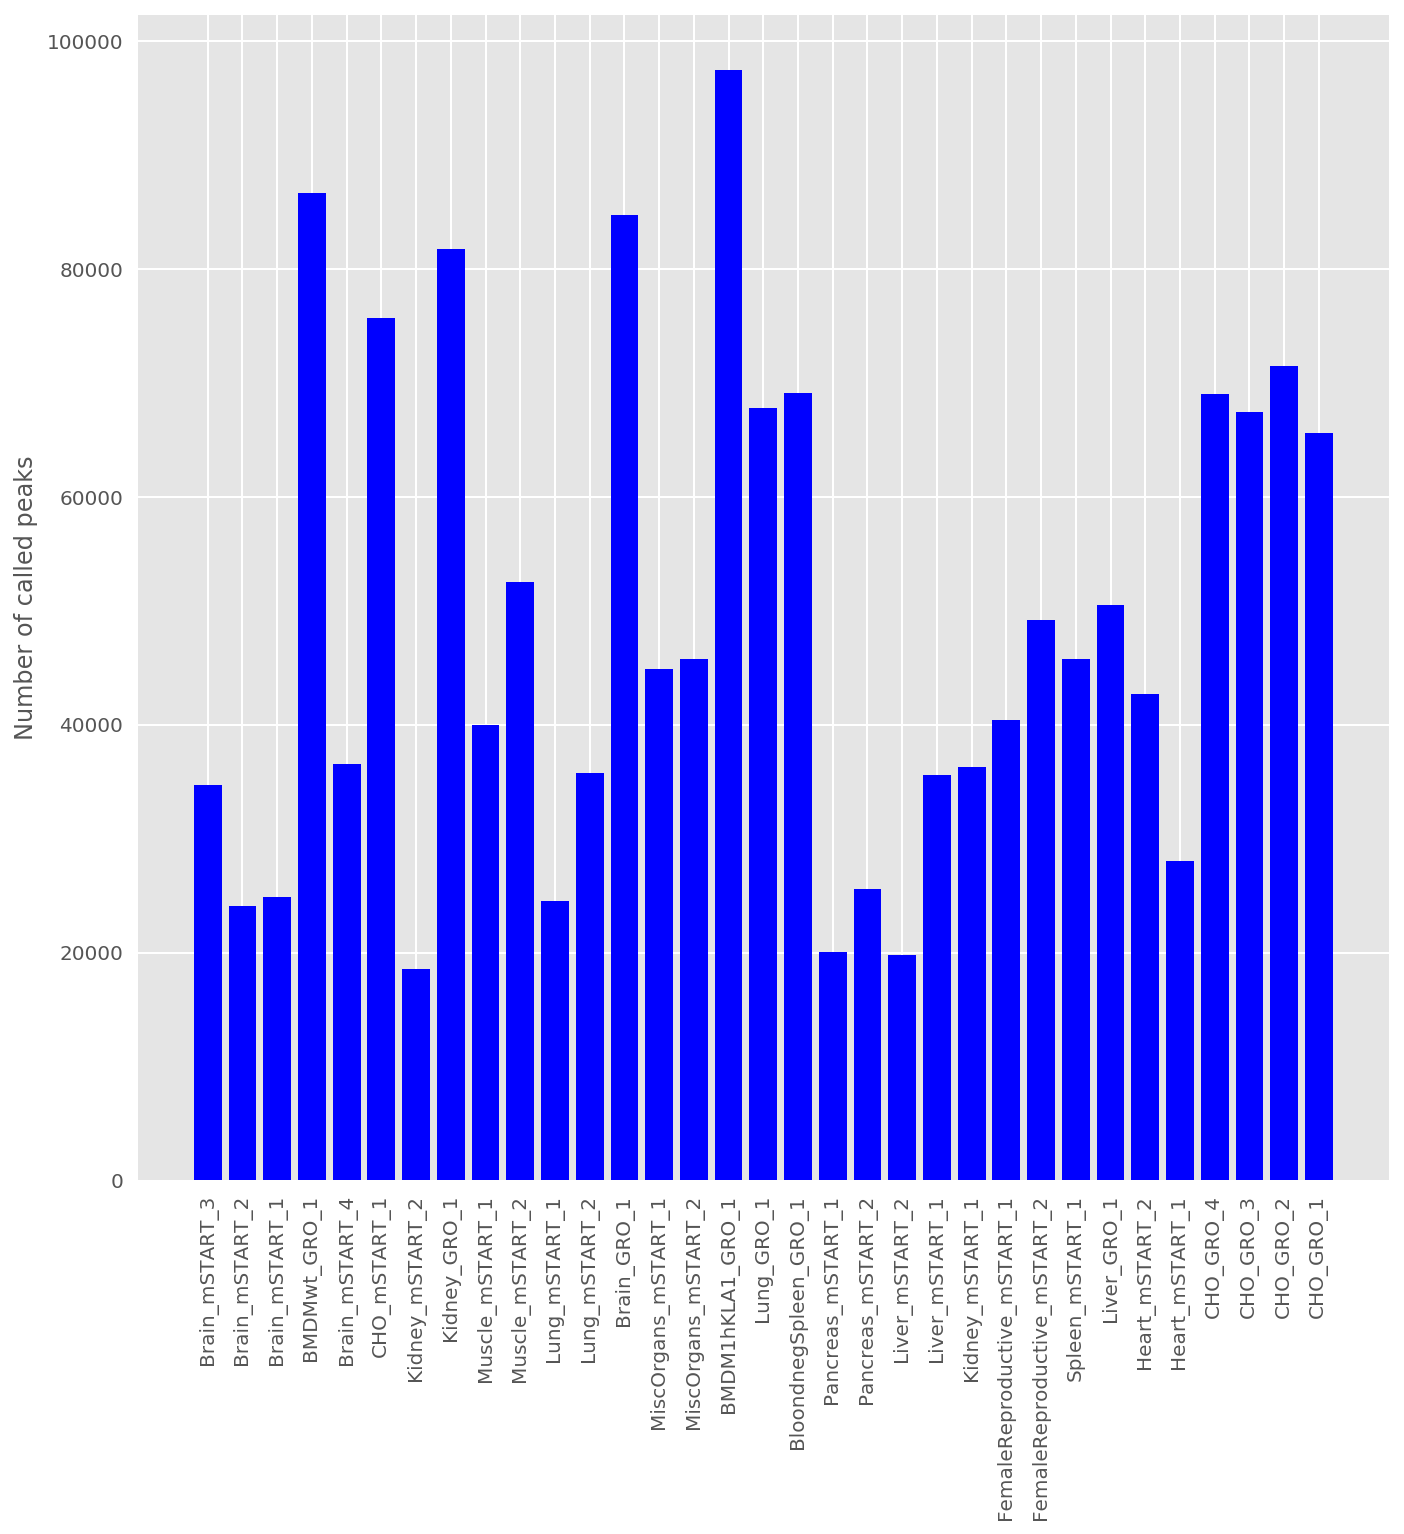

In [23]:
f = plt.figure(figsize=(10,10))
plt.bar(range(len(num_peaks)), num_peaks.values(), align='center',color='blue')  # python 2.x
plt.xticks(range(len(num_peaks)), num_peaks.keys(),rotation='vertical')  # in python 2.x
plt.ylabel('Number of called peaks')
plt.savefig('Results/Figures/number_overall_peaks.png',bbox_inches='tight')

### TODO:  Correlate the number of peaks to the number of aligned reads (or %). If duplicates, take the minimum of the two since the peaks were merged to require both of them

## Compare annotated peaks (these are also strict merging across replicates)

In [16]:
num_peaks_prom = dict()
for curr_tissue in tissues:
    curr_raw = glob.glob(curr_tissue + '/*/')
    print curr_tissue
    for j in curr_raw:
        curr_type = j.split('/')[-2]  
        print curr_type
        if not curr_type == 'ATAC':
            count = 1
            for f in  glob.glob(j + '*f06_annoPeaks/*promoter'):
                print f
                tmp_name = curr_tissue + '_' + curr_type
                num_peaks_prom[tmp_name] = len(pd.read_csv(f,sep='\t',comment='#'))
                


BloondnegSpleen
GRO
BloondnegSpleen/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
mSTART
ATAC
BMDM1hKLA1
GRO
BMDM1hKLA1/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
ATAC
BMDMwt
GRO
BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
ATAC
Brain
GRO
Brain/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
mSTART
Brain/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
ATAC
Brain7neg1
mSTART
FemaleReproductive
mSTART
FemaleReproductive/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
Heart
mSTART
Heart/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
Intestine
mSTART
Kidney
GRO
Kidney/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
mSTART
Kidney/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
ATAC
Liver
GRO
Liver/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
mSTART
Liver/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
ATAC
Lung
GRO
Lung/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
mSTART
Lung/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
ATAC
MiscOrgans
mSTART
MiscOrgans/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter
Muscle
mSTA

In [17]:
num_peaks_prom

{'BMDM1hKLA1_GRO': 29592,
 'BMDMwt_GRO': 29951,
 'BloondnegSpleen_GRO': 26916,
 'Brain_GRO': 31998,
 'Brain_mSTART': 10824,
 'CHO_GRO': 18913,
 'CHO_mSTART': 28999,
 'FemaleReproductive_mSTART': 8957,
 'Heart_mSTART': 9517,
 'Kidney_GRO': 29585,
 'Kidney_mSTART': 5808,
 'Liver_GRO': 19740,
 'Liver_mSTART': 6339,
 'Lung_GRO': 27840,
 'Lung_mSTART': 4110,
 'MiscOrgans_mSTART': 17425,
 'Muscle_mSTART': 12823,
 'Pancreas_mSTART': 6152,
 'Spleen_mSTART': 21951}

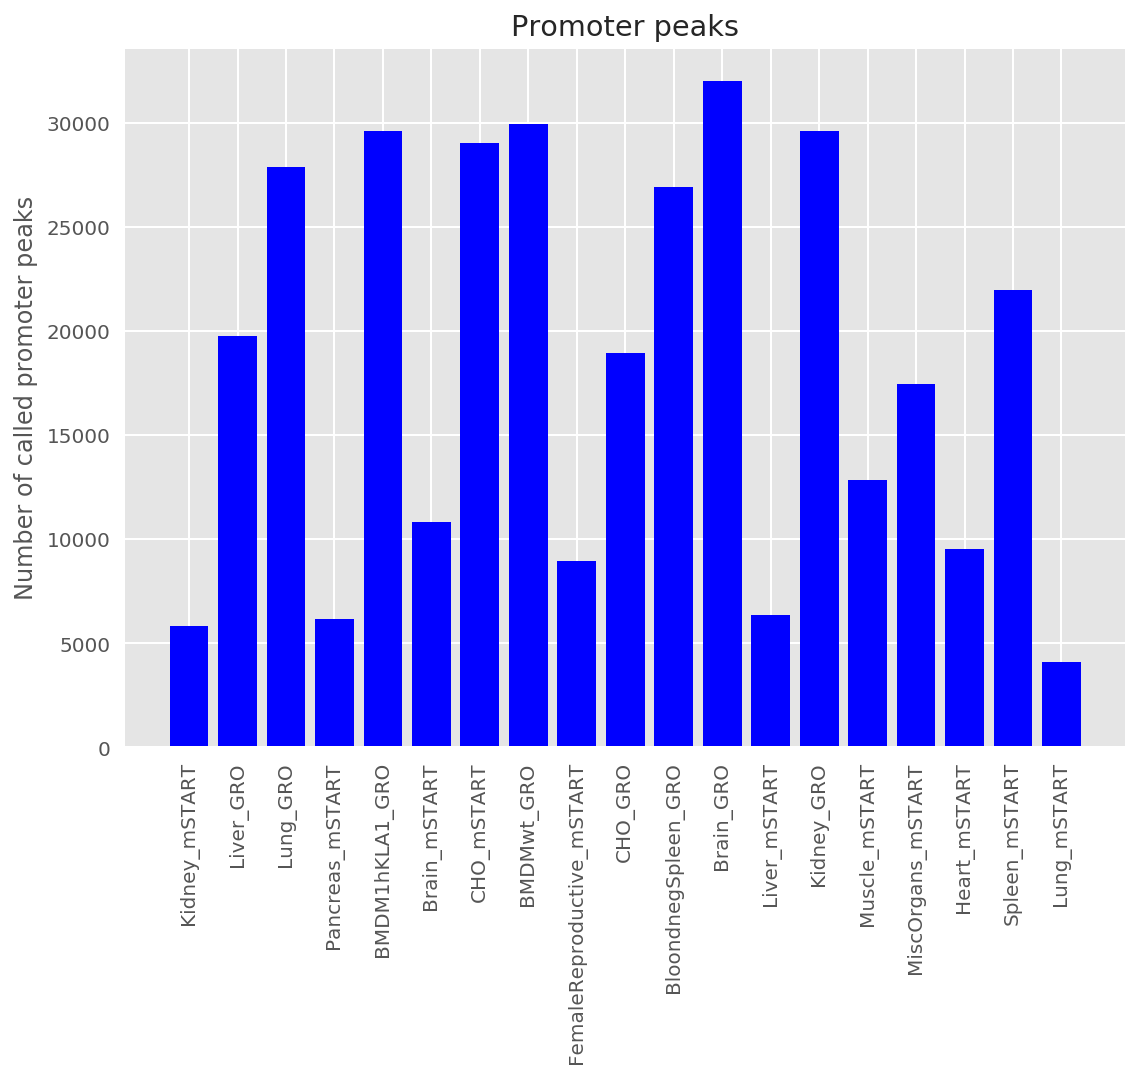

In [20]:
plt.bar(range(len(num_peaks_prom)), num_peaks_prom.values(), align='center',color='blue')  # python 2.x
plt.xticks(range(len(num_peaks_prom)), num_peaks_prom.keys(),rotation='vertical')  # in python 2.x
plt.ylabel('Number of called promoter peaks')
plt.title('Promoter peaks')

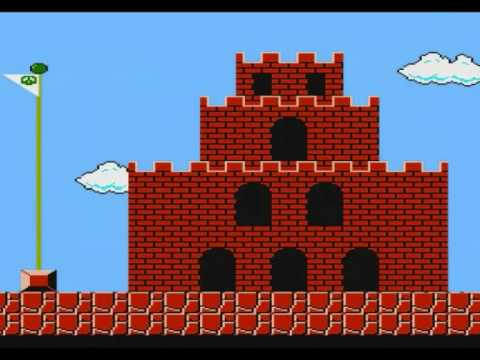

In [136]:
from IPython.display import Image
Image(filename='/home/isshamie/mario_chapter.jpg',width=600)

# Look at gene names 

## Gene peak files sepearate out 
Only gene_id column, no transcripts or exons for now

In [42]:
genome_anno = add_fields_new_annotation('/data/isshamie/TSS_CHO/mRNA.peak')
genome_anno_collapsed = genome_anno.drop_duplicates(subset='gene_id') # Create df indexed by gene_id
genome_anno_collapsed.set_index('gene_id',inplace=True)

In [43]:
print len(genome_anno_collapsed)

34338


## Create gene_by_sample_TSS dataframe
### This is a binary matrix that says the presence or absence of a gene
### Will also save the gene_centric  dfs made for each tissue which has info on number of promoters seen and divergent txn

In [78]:
gene_by_sample_TSS = pd.DataFrame(index=genome_anno_collapsed.index)
tissues = ['BloondnegSpleen','BMDM1hKLA1','BMDMwt','Brain','Brain7neg1',
          'FemaleReproductive','Heart','Intestine','Kidney','Liver','Lung',
           'MiscOrgans','Muscle','Pancreas','Skin','Spleen','Total','CHO']
for i in tissues:
    curr_raw = glob.glob(i + '/*/')
    print curr_raw
    for j in curr_raw:
        curr_type = j.split('/')[-2]  
        print curr_type
        if not curr_type == 'ATAC':
            tmp = glob.glob(j+'f06_annoPeaks/*.anno')
            for peak_f in tmp:
                curr_name = i + '_' + curr_type
                print peak_f
                curr_peaks = peaks_within_x(peak_f)
                curr_gene_TSS = gene_centric_TSS(curr_peaks,genome_anno_collapsed)
                gene_by_sample_TSS.loc[curr_gene_TSS[curr_gene_TSS['hasPromoter']].index,curr_name] = 1 #All the genes that have a promoter, set to one for that tissue
                print(len(curr_gene_TSS[curr_gene_TSS['hasPromoter']]))
                curr_gene_TSS.to_csv(peak_f + '.geneCentric')

        



['BloondnegSpleen/GRO/', 'BloondnegSpleen/mSTART/', 'BloondnegSpleen/ATAC/']
GRO
BloondnegSpleen/GRO/f06_annoPeaks/merge_bg_2.anno


14117it [01:12, 193.98it/s]


12098
mSTART
ATAC
['BMDM1hKLA1/GRO/', 'BMDM1hKLA1/ATAC/']
GRO
BMDM1hKLA1/GRO/f06_annoPeaks/merge_bg_2.anno


13787it [01:26, 160.11it/s]


11842
ATAC
['BMDMwt/GRO/', 'BMDMwt/ATAC/']
GRO
BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno


14138it [01:26, 163.45it/s]


12139
ATAC
['Brain/GRO/', 'Brain/mSTART/', 'Brain/ATAC/']
GRO
Brain/GRO/f06_annoPeaks/merge_bg_2.anno


15828it [01:28, 177.85it/s]


13942
mSTART
Brain/mSTART/f06_annoPeaks/merge_bg_2.anno


9798it [00:46, 210.42it/s]


8979
ATAC
['Brain7neg1/mSTART/']
mSTART
['FemaleReproductive/mSTART/']
mSTART
FemaleReproductive/mSTART/f06_annoPeaks/merge_bg_2.anno


8600it [00:39, 218.98it/s]


7617
['Heart/mSTART/']
mSTART
Heart/mSTART/f06_annoPeaks/merge_bg_2.anno


8720it [00:40, 215.46it/s]


7855
['Intestine/mSTART/']
mSTART
['Kidney/GRO/', 'Kidney/mSTART/', 'Kidney/ATAC/']
GRO
Kidney/GRO/f06_annoPeaks/merge_bg_2.anno


15216it [01:17, 195.75it/s]


13113
mSTART
Kidney/mSTART/f06_annoPeaks/merge_bg_2.anno


6006it [00:26, 227.81it/s]


5358
ATAC
['Liver/GRO/', 'Liver/mSTART/', 'Liver/ATAC/']
GRO
Liver/GRO/f06_annoPeaks/merge_bg_2.anno


12385it [00:58, 211.80it/s]


10107
mSTART
Liver/mSTART/f06_annoPeaks/merge_bg_2.anno


6215it [00:27, 230.08it/s]


5339
ATAC
['Lung/GRO/', 'Lung/mSTART/', 'Lung/ATAC/']
GRO
Lung/GRO/f06_annoPeaks/merge_bg_2.anno


15069it [01:15, 198.63it/s]


13063
mSTART
Lung/mSTART/f06_annoPeaks/merge_bg_2.anno


4347it [00:19, 228.50it/s]


3659
ATAC
['MiscOrgans/mSTART/']
mSTART
MiscOrgans/mSTART/f06_annoPeaks/merge_bg_2.anno


12453it [00:56, 218.84it/s]


10971
['Muscle/mSTART/']
mSTART
Muscle/mSTART/f06_annoPeaks/merge_bg_2.anno


10485it [00:47, 220.34it/s]


9318
['Pancreas/mSTART/']
mSTART
Pancreas/mSTART/f06_annoPeaks/merge_bg_2.anno


6242it [00:27, 229.75it/s]


5451
['Skin/mSTART/']
mSTART
['Spleen/mSTART/']
mSTART
Spleen/mSTART/f06_annoPeaks/merge_bg_2.anno


13340it [01:04, 205.63it/s]


11888
['Total/mSTART/']
mSTART
['CHO/GRO/', 'CHO/mSTART/']
GRO
CHO/GRO/f06_annoPeaks/merge_bg_2.anno


11114it [00:50, 220.95it/s]


7921
mSTART
CHO/mSTART/f06_annoPeaks/merge_bg_2.anno


13682it [01:09, 195.53it/s]


11997


In [79]:
gene_by_sample_TSS.fillna(0,inplace=True)

# Results
### Count the number of gene_id that are covered by all tissues

In [31]:
gene_by_sample_TSS = pd.read_csv('/data/isshamie/CH_tissue_TSS/Results/gene_by_sample_TSS.tsv',index_col=0)

In [32]:
gene_by_sample_TSS.head()

,BloondnegSpleen_GRO,BMDM1hKLA1_GRO,BMDMwt_GRO,Brain_GRO,Brain_mSTART,FemaleReproductive_mSTART,Heart_mSTART,Kidney_GRO,Kidney_mSTART,Liver_GRO,Liver_mSTART,Lung_GRO,Lung_mSTART,MiscOrgans_mSTART,Muscle_mSTART,Pancreas_mSTART,Spleen_mSTART,CHO_GRO,CHO_mSTART
gene_id,,,,,,,,,,,,,,,,,,,
gene_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_1_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_1_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
gene_1_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
meta_gene_by_sample_TSS = pd.DataFrame()
meta_gene_by_sample_TSS['Total Tissues'] = gene_by_sample_TSS.sum(axis=1)
meta_gene_by_sample_TSS['Total Tissues without CHO'] = gene_by_sample_TSS.loc[:,~gene_by_sample_TSS.columns.str.contains('CHO')].sum(axis=1)
meta_gene_by_sample_TSS['Total genes in CHO'] = gene_by_sample_TSS.loc[:,gene_by_sample_TSS.columns.str.contains('CHO')].sum(axis=1)


In [84]:
gene_by_sample_TSS.to_csv('/data/isshamie/CH_tissue_TSS/Results/gene_by_sample_TSS.tsv')
meta_gene_by_sample_TSS.to_csv('/data/isshamie/CH_tissue_TSS/Results/meta_gene_by_sample_TSS.tsv')

######## Load in results

In [66]:
print(np.sum(gene_by_sample_TSS>0))

BloondnegSpleen_GRO          12098
BMDM1hKLA1_GRO               11842
BMDMwt_GRO                   12139
Brain_GRO                    13942
Brain_mSTART                  8979
FemaleReproductive_mSTART     7617
Heart_mSTART                  7855
Kidney_GRO                   13113
Kidney_mSTART                 5358
Liver_GRO                    10107
Liver_mSTART                  5339
Lung_GRO                     13063
Lung_mSTART                   3659
MiscOrgans_mSTART            10971
Muscle_mSTART                 9318
Pancreas_mSTART               5451
Spleen_mSTART                11888
CHO_GRO                       7921
CHO_mSTART                   11997
dtype: int64


In [64]:
print(np.sum(gene_by_sample_TSS['BMDM1hKLA1_GRO'] >0))
print(np.sum(gene_by_sample_TSS['BMDMwt_GRO'] >0))

11842
12139


In [65]:
print(np.sum(gene_by_sample_TSS['CHO_mSTART'] >0))

11997


In [34]:
meta_gene_by_sample_TSS

,Total Tissues,Total Tissues without CHO,Total genes in CHO
gene_id,,,
gene_1_1,0.0,0.0,0.0
gene_1_2,0.0,0.0,0.0
gene_1_3,0.0,0.0,0.0
gene_2,5.0,4.0,1.0
gene_1_4,19.0,17.0,2.0
gene_3_1,18.0,16.0,2.0
gene_3_2,5.0,4.0,1.0
gene_4_1,0.0,0.0,0.0
gene_4_2,4.0,2.0,2.0


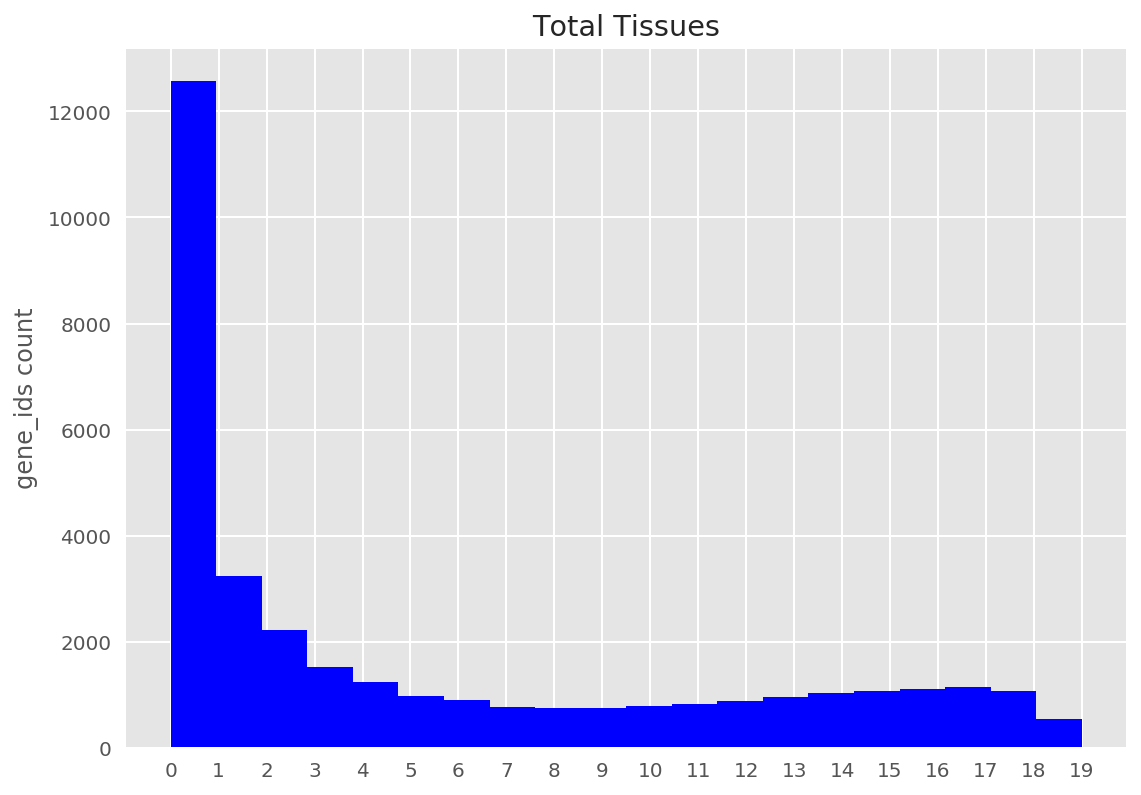

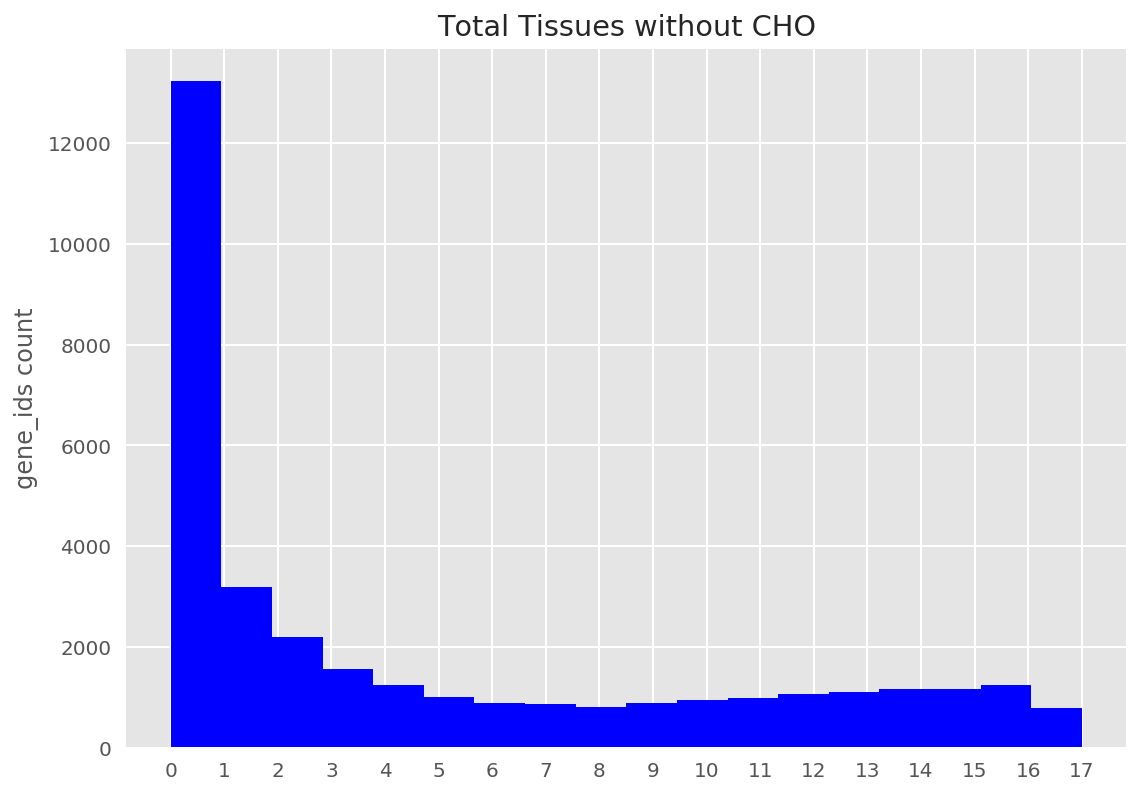

In [60]:
f = plt.Figure()

num_bins = int(np.max(meta_gene_by_sample_TSS['Total Tissues']))+1

meta_gene_by_sample_TSS.hist('Total Tissues',bins=num_bins,color='blue')
plt.ylabel('gene_ids count')
plt.xticks(range(num_bins))
plt.savefig('/data/isshamie/CH_tissue_TSS/Results/Figures/gene_by_tissue.png',bbox_inches='tight')

num_bins = int(np.max(meta_gene_by_sample_TSS['Total Tissues without CHO']))+1
meta_gene_by_sample_TSS.hist('Total Tissues without CHO',bins=num_bins,color='blue')
plt.ylabel('gene_ids count')
plt.xticks(range(num_bins))
plt.savefig('/data/isshamie/CH_tissue_TSS/Results/Figures/gene_by_tissue_without_CHO.png',bbox_inches='tight')

Either GRO or mSTART: 5070 Both GRO or mSTART: 7424


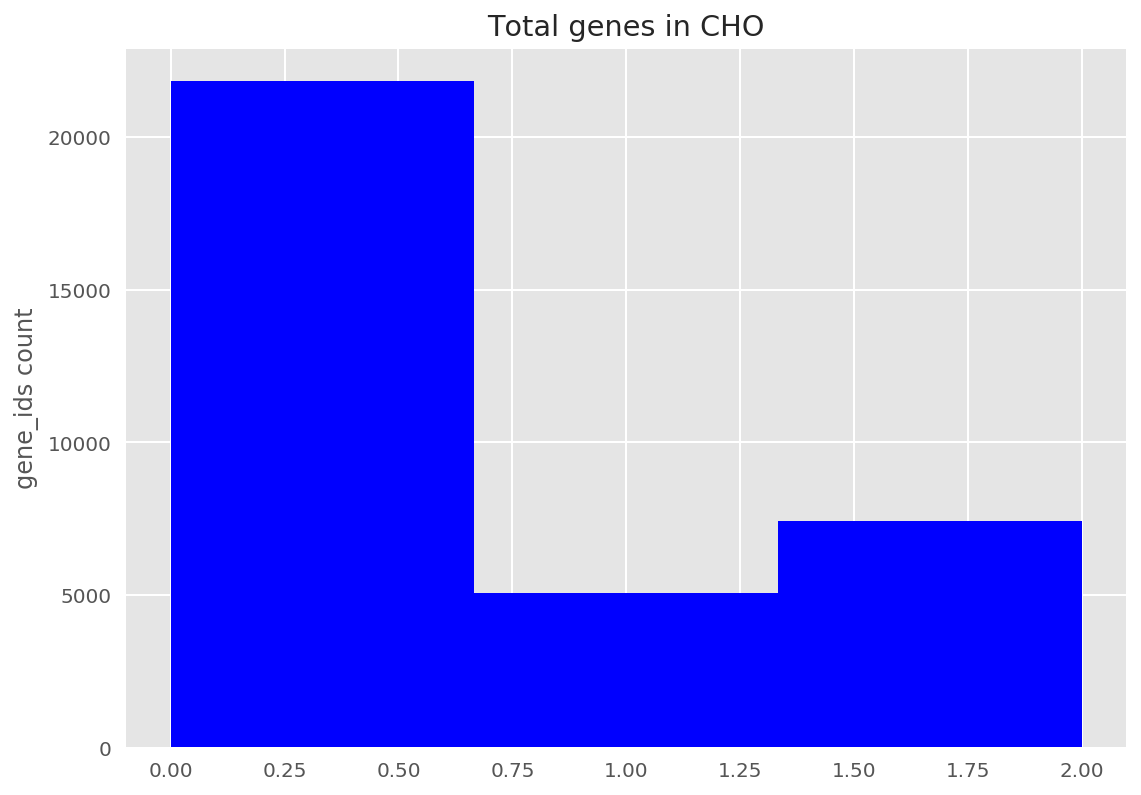

In [47]:
meta_gene_by_sample_TSS.hist('Total genes in CHO',bins=3,color='blue')
plt.ylabel('gene_ids count')
plt.savefig('/data/isshamie/CH_tissue_TSS/Results/Figures/gene_by_CHO.png',bbox_inches='tight')

cho_one = np.sum(meta_gene_by_sample_TSS['Total genes in CHO'] == 1)
cho_both = np.sum(meta_gene_by_sample_TSS['Total genes in CHO'] == 2)
print 'Either GRO or mSTART:',cho_one,
print 'Both GRO or mSTART:',cho_both,



In [38]:
np.sum(meta_gene_by_sample_TSS['Total genes in CHO'] > 0)

12494

In [39]:
print('Total number of gene_id', len(meta_gene_by_sample_TSS))
print ('Number of non-activated genes:',np.sum(meta_gene_by_sample_TSS['Total Tissues'] == 0))
print ('Number of activated genes:',np.sum(meta_gene_by_sample_TSS['Total Tissues'] > 0))

print ('Number of non-activated genes w/out CHO:',np.sum(meta_gene_by_sample_TSS['Total Tissues without CHO'] == 0))
print ('Number of activated genes w/out CHO:',np.sum(meta_gene_by_sample_TSS['Total Tissues without CHO'] > 0))
print ('Number of activated genes in CHO:',np.sum(meta_gene_by_sample_TSS['Total genes in CHO'] > 0))

('Total number of gene_id', 34338)
('Number of non-activated genes:', 12573)
('Number of activated genes:', 21765)
('Number of non-activated genes w/out CHO:', 13235)
('Number of activated genes w/out CHO:', 21103)
('Number of activated genes in CHO:', 12494)


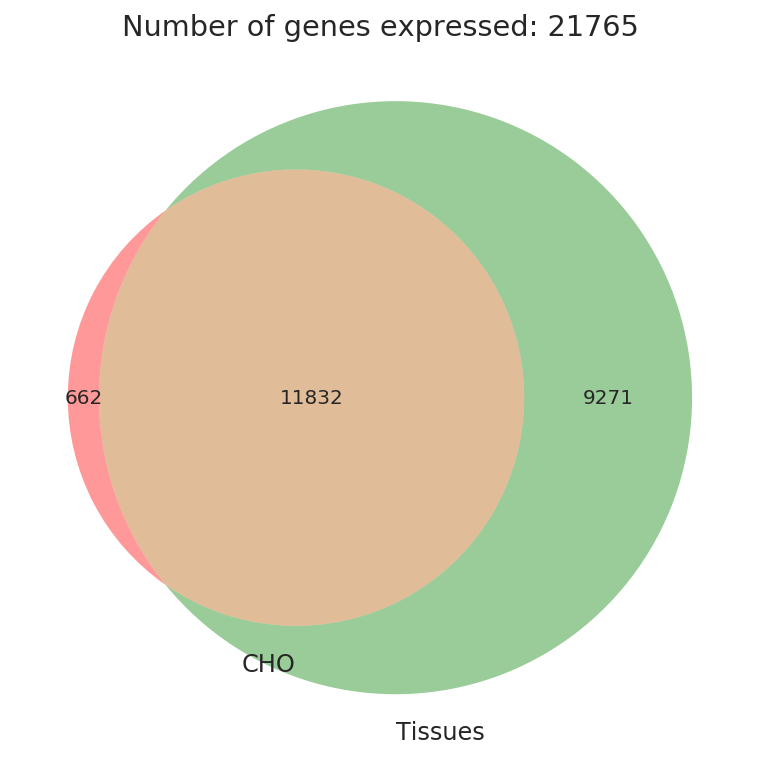

In [61]:
wout_cho = np.sum(meta_gene_by_sample_TSS['Total Tissues without CHO']>0)
w_cho = np.sum(meta_gene_by_sample_TSS['Total genes in CHO']>0)

intersect_cho_tissues = len(meta_gene_by_sample_TSS[meta_gene_by_sample_TSS['Total genes in CHO'] >0].index.intersection(
    meta_gene_by_sample_TSS[meta_gene_by_sample_TSS['Total Tissues without CHO'] >0].index))

venn2((w_cho-intersect_cho_tissues,wout_cho-intersect_cho_tissues,intersect_cho_tissues),set_labels=('CHO','Tissues'))


plt.title('Number of genes expressed: ' + str(np.sum(meta_gene_by_sample_TSS['Total Tissues'] > 0)))
plt.savefig('/data/isshamie/CH_tissue_TSS/Results/Figures/CHO_vs_tissues_genes.png',bbox_inches='tight')

In [ ]:
g = sns.clustermap(gene_by_sample_TSS,col_cluster=True,row_cluster=False,metric='hamming')

KeyboardInterrupt: 

In [9]:
gene_by_sample_TSS = pd.read_csv('/data/isshamie/CH_tissue_TSS/gene_by_sample_TSS.tsv',index_col=0)

In [10]:
gene_by_sample_TSS.head()

,BloondnegSpleen_GRO,BMDM1hKLA1_GRO,BMDMwt_GRO,Brain_GRO,Brain_mSTART,FemaleReproductive_mSTART,Heart_mSTART,Kidney_GRO,Kidney_mSTART,Liver_GRO,Liver_mSTART,Lung_GRO,Lung_mSTART,MiscOrgans_mSTART,Muscle_mSTART,Pancreas_mSTART,Spleen_mSTART,CHO_GRO,CHO_mSTART
gene_id,,,,,,,,,,,,,,,,,,,
gene_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_1_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_1_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
gene_1_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


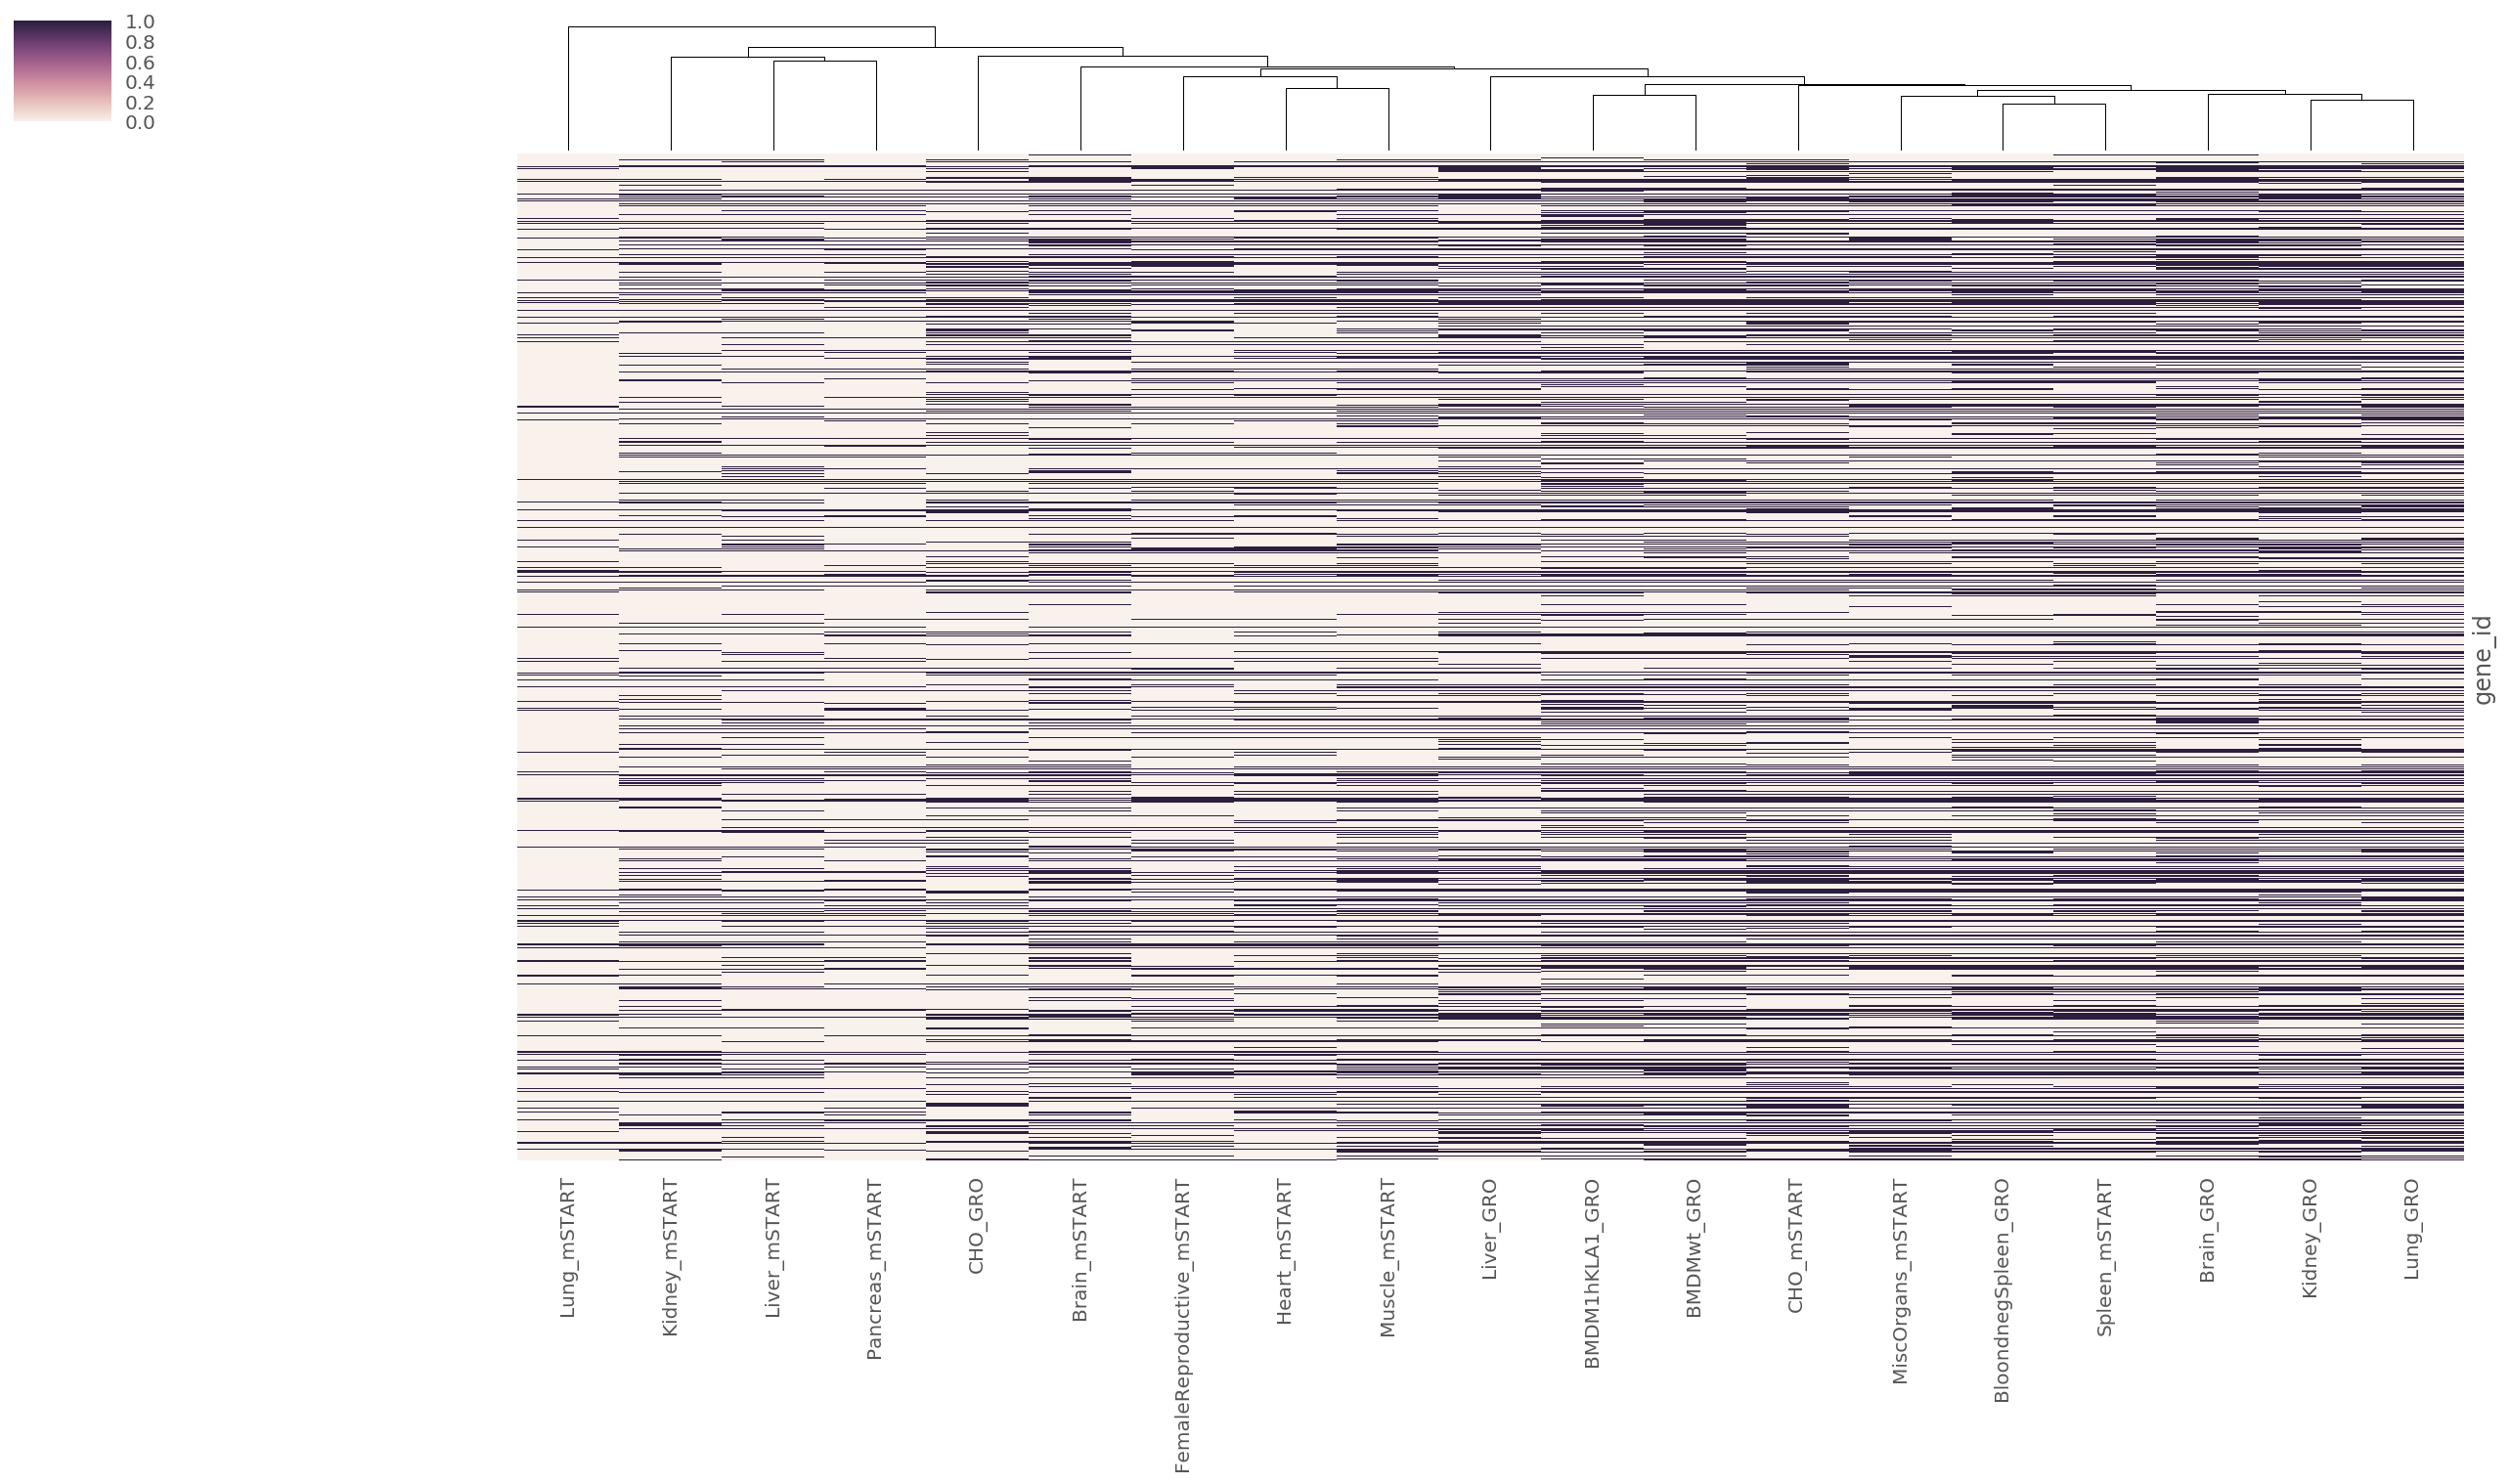

In [18]:
g = sns.clustermap(gene_by_sample_TSS,col_cluster=True,figsize=(20,10),row_cluster=False,metric='jaccard',yticklabels=False)
g.savefig('/data/isshamie/CH_tissue_TSS/TSS_cluster_jaccard.png')

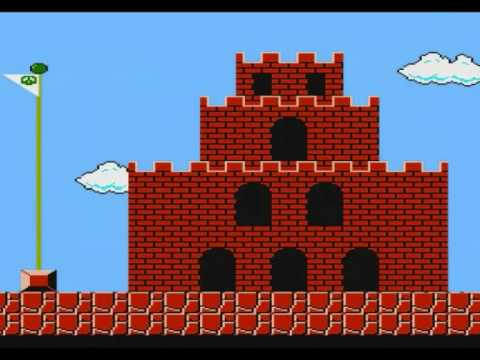

In [136]:
from IPython.display import Image
Image(filename='/home/isshamie/mario_chapter.jpg',width=600)

### Look at peak Merged-picr_36-10050726-2 near gene HIST1H1E. Confusing gff3 and confusing annotation

In [153]:
print curr_peaks.loc[0]['Annotation']
curr_peaks['Nearest PromoterID'][0]

promoter-TSS (ID=asmbl_48620.exon2;Parent=asmbl_48620;gene_id=gene_17121_1;gene=HIST1H1D;transcript_id=asmbl_48620)


'ID=asmbl_48569.exon1;Parent=asmbl_48569;gene_id=gene_17121_2;gene=HIST1H1E;transcript_id=asmbl_48569'